# Real-Time Object Detection (YOLO)

การตรวจจับวัตถุแบบ Real-Time ( Object Detection ) ปัจจุบันก็มี Tool อยู่หลายตัว แต่เราจะมาลองใช้ You Only Look Once (YOLO) สามารถ Detect ได้ทั้ง Image และ Video โดยจะทำการ Process ที่ Frame Rate 30FPS และมี Mean Average Precision ( mAP ) 57.9% ซึ่งมีความรวดเร็วและแม่นยำอยู่ที่ .5 IOU นอกจากนี้ยังสามารถ Tradeoff ระหว่าง Speed และ Accuracy ได้ง่ายเพียงแค่ทำการเปลี่ยน Size ของ Model โดยไม่มีการ Retrain

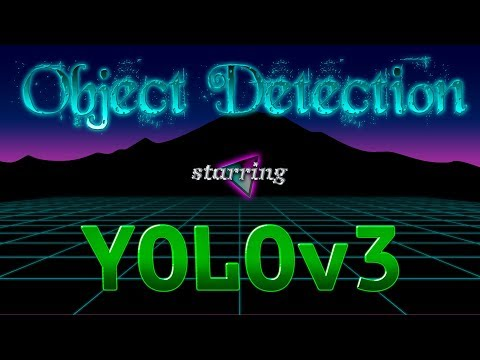

In [1]:
from IPython.display import YouTubeVideo
YOUTUBE_ID = 'MPU2HistivI'
YouTubeVideo(YOUTUBE_ID)

## How it Work

Object Detection จะทำการรวม Classifier + Localizer เป็นการรวมกันระหว่างการแยกวัตถุ และการระบุตำแหน่ง ในลักษณะของ Bounding Box การทำงานของ YOLO จะต่างจากพวก R-CNN หรือ Fast R-CNN โดยจะใช้ Single Neural Network แบบ Full Image ทั้งภาพ ด้วยการมองภาพเพียงครั้งเดียว ตามชื่อของมัน ทำให้มันเร็วกว่า R-CNN ถึง 1000x เท่า, เร็วกว่า Fast R-CNN ถึง 100x เท่า และภายใน Network

![alt text](https://cdn-images-1.medium.com/max/800/1*A2njei9zJbd7G-ai83l5BA.png)

กระบวนการ Detection จะทำการแบ่ง Image ออกเป็น Grid ขนาด S x S ภาพซ้ายมือ แต่ละ Cell จะทำการ Predict ความเป็นไปได้ของ Bounding Box และความน่าจะเป็น Probability แทนด้วย N จะได้กล่องขนาด S x S x N ภาพกลาง จากนั้นจะทำการกำหนด Threshold เพื่อใช้เป็นเกณฑ์ในการลบกล่องที่มีความน่าจะเป็นต่ำออกไป ซึ่งจะเหลือกล่องที่มีความน่าจะเป็นสูงสุด ภาพขวามือ


## Image Pre-Train Model Detection

In [2]:
! git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5946, done.
remote: Total 5946 (delta 0), reused 0 (delta 0), pack-reused 5946
Receiving objects: 100% (5946/5946), 6.37 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (3928/3928), done.


In [3]:
% cd ../content/darknet
!make

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o

In [4]:
! ./darknet imtest data/eagle.jpg

L2 Norm: 371.979095
Not compiled with OpenCV, saving to Original.png instead
Not compiled with OpenCV, saving to Gray.png instead
Not compiled with OpenCV, saving to C1.png instead
Not compiled with OpenCV, saving to C2.png instead
Not compiled with OpenCV, saving to C3.png instead
Not compiled with OpenCV, saving to C4.png instead


In [5]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2022-04-25 04:15:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.8MB/s    in 11s     

2022-04-25 04:15:40 (21.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg -out results/dog

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

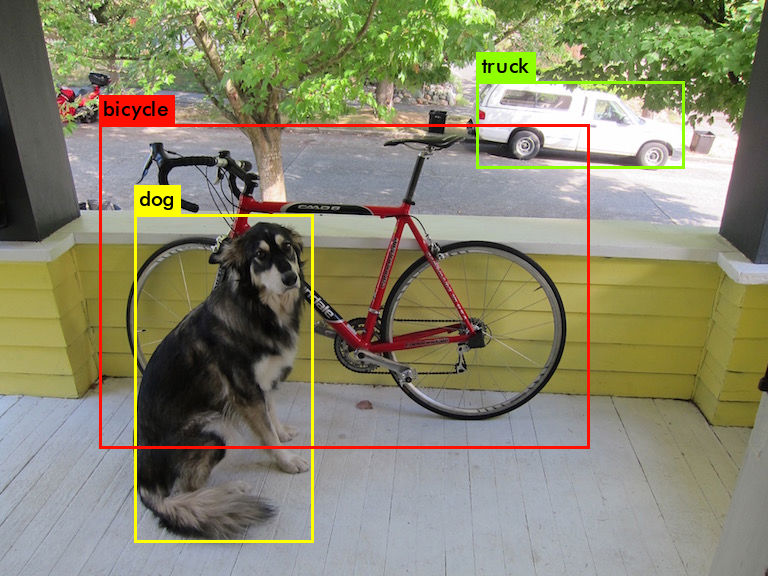

In [7]:
from IPython.display import Image
Image('results/dog.jpg')

## Threshold

โดย Default จะแสดง Object ที่ทำการ Detect ได้ ตั้งแต่ Threshold 0.25 ขึ้นไป ซึ่งสามารถแสดง Object Detection ทั้งหมดได้ โดยกำหนด Threshold เป็น 0 ด้วยคำสั่ง -thresh 0

In [8]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg -thresh 0.05 -out results/dog_thresh_05

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

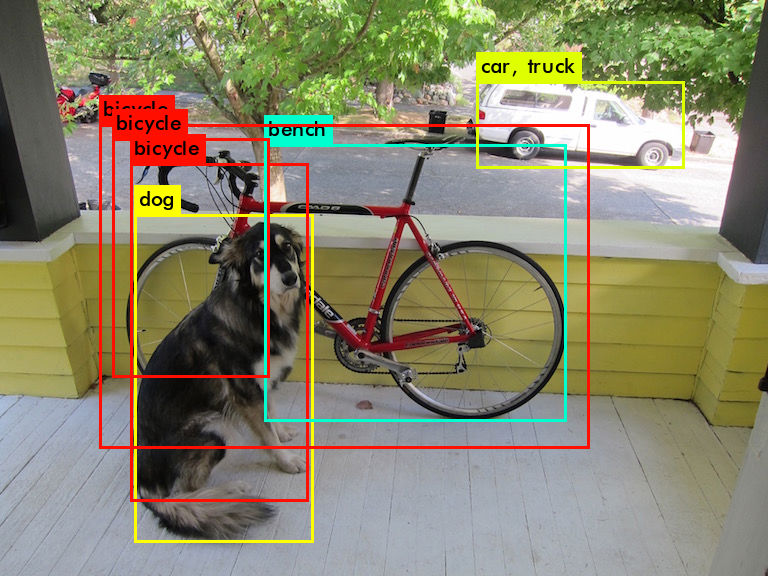

In [9]:
from IPython.display import Image
Image('results/dog_thresh_05.jpg')

## Real-Time Detection Webcam

In [10]:
import cv2
import argparse
import numpy as np

[https://pjreddie.com/darknet/yolo/](https://pjreddie.com/darknet/yolo)

[https://medium.com/@enriqueav/object-detection-with-yolo-implementations-and-how-to-use-them-5da928356035](https://medium.com/@enriqueav/object-detection-with-yolo-implementations-and-how-to-use-them-5da928356035)

[https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088](https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088)

[https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/](https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/)

[https://www.arunponnusamy.com/yolo-object-detection-opencv-python.html](https://www.arunponnusamy.com/yolo-object-detection-opencv-python.html)